In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from datetime import date
from matplotlib.animation import FuncAnimation
from requests_ntlm import HttpNtlmAuth
import requests
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pycountry_convert as pc
import os
import re
import shutil
import time
import datetime

%matplotlib notebook

In [2]:
def get_ecdc_data():
        try:
            today = datetime.date.today()
            r = requests.get('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv',
                        auth=HttpNtlmAuth(':',':'))
            data = r.text.replace('\r', '')
            filename = str(today) + '_ECDC_data.csv'
            with open(filename, 'w', encoding='utf-8') as f:
                f.write(data)
        except:
            # TODO: catch invalid request and load most recent dataset
            pass
        
        return pd.read_csv(filename)
            
get_ecdc_data()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,03/04/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
1,02/04/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
2,01/04/2020,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
3,31/03/2020,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
4,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
8497,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8498,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
8499,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8500,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [4]:
def find_csv(directory = r"C:\Users\Graham Delafield\Downloads"):
    file_candidates = []
    today = datetime.datetime.today().strftime("%m-%d-%Y")
    for root, dirs, files in os.walk(directory):
        for file in files:
            filename = os.path.join(root, file)
            if filename.endswith(".csv"):
                path = os.path.abspath(filename)
                mtime = os.path.getmtime(filename)
                mod_timestamp = datetime.datetime.fromtimestamp(mtime)
                mod_timestamp = mod_timestamp.strftime("%m-%d-%Y")
                if mod_timestamp == today:
                    file_candidates.append((path, mtime))

    return file_candidates

In [5]:
def sort_files(file_list):
    if len(file_list) == 1:
        return file_list[0][0]
    file_list = sorted(file_list, key=lambda x: x[1], reverse=True)
    return file_list[0][0]    

In [6]:
def move_file(file_path, new_dest_path):
    today = date.today()
    file_path = r"{}".format(file_path)
    s = file_path.split("\\")
    s[-1] = str(today)+"_"+s[-1]
    new_dest_path = "\\".join([new_dest_path, s[-1]])
    new_file_path = "".join(s)
    shutil.move(file_path, new_dest_path)
    print(new_dest_path)
    return new_dest_path
# move_file(data, r"C:\Users\Graham Delafield\Desktop\Covid")

In [151]:
df = get_ecdc_data().fillna(0)
df.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
9102,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9103,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
9104,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9105,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0
9106,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [152]:
def format_columns(dataframe):
    df = dataframe
    cols = [c for c in df.columns]
    pattern = re.compile(r"[A-Z]")
    for i, c in enumerate(cols):
        match = re.search(pattern, c)
        while match != None:
            span = match.span()
            first, last = span[0], span[1]
            c = c[:first] + "_" + c[first:last].lower() + c[last:]
            match = re.search(pattern, c)
        cols[i] = c
    df.columns = cols
    return df

format_columns(df)

,date_rep,day,month,year,cases,deaths,countries_and_territories,geo_id,countryterritory_code,pop_data2018
0,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,05/04/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,04/04/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,03/04/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,02/04/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
9102,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9103,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
9104,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9105,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [153]:
def format_dates(dataframe):
    df = dataframe
    dates = list(set(df.date_rep))
    formatted = [datetime.datetime.strptime(date, '%d/%m/%Y').date()
                 for date in dates]
    formatted = [datetime.datetime.strftime(date, '%Y-%m-%d')
                 for date in formatted]
    map_dict = dict(zip(dates, formatted))
    df.date_rep = df.date_rep.map(map_dict)
    return df

format_dates(df)
df.head()

,date_rep,day,month,year,cases,deaths,countries_and_territories,geo_id,countryterritory_code,pop_data2018
0,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0


In [154]:
def add_dates(data_dataframe):
    """
    The WHO .csv file contains dates for all entries listed
    but does not contain the dates prior to when countries reported
    their first confirmed case.
    
    This function takes returns an dataframe with indexes that include
    the original date. This will be merged with the data using the 
    'unmelt()' function.
    """
    
#     origin = date(year, month, day) # earliest recorded date in WHO files
#     last = data_dataframe.iloc[-1, :]["DateRep"]
    dates = list(set(data_dataframe.date_rep))
    dates = [datetime.datetime.strptime(date, "%Y-%m-%d").date() 
             for date in dates]
    dates = sorted(dates)
    first, last = dates[0], dates[-1]
    delta = last-first # days since earliest report
    date_list = pd.date_range(first, periods=delta.days)
    df = pd.DataFrame(date_list)
    df.columns = ["date"]
    df.set_index("date", inplace=True)
    
    return df

add_dates(df)

""
date
2019-12-31
2020-01-01
2020-01-02
2020-01-03
2020-01-04
...
2020-04-01
2020-04-02
2020-04-03


In [163]:
data = get_ecdc_data()
data = format_columns(data)
data = format_dates(data)
dates = add_dates(data)
cases = unmelt(data, dates, "cases").cumsum()
deaths = unmelt(data, dates, "deaths").cumsum()



In [87]:
def unmelt(data_dataframe, dates_dataframe, column):
    """
    This function reorganizes the .csv to have all 
    countries contained as columns within a single
    dataframe.
    
    """
    data = data_dataframe
    dates = dates_dataframe
    for country in set(data.countries_and_territories):
        sub = data[data.countries_and_territories==country][["date_rep", column]].set_index("date_rep")
        sub.columns=[country]
        dates = pd.merge(dates, sub, left_index=True, right_index=True, how="outer").fillna(0)

    return dates

In [7]:
def reorder_data(dataframe):
    """
    This function orders the columns according to their most recent
    number of incidents.
    """
    df = dataframe
    col_names = [c for c in df.columns]
    col_vals = df.iloc[-1, :].values
    z = sorted(zip(col_names, col_vals), key=lambda x: x[1], reverse=True)
    new_cols = [t[0] for t in z]
    new_df = df.reindex(columns=new_cols)
    
    return new_df 

In [8]:
def top1(dataframe):
    """
    This function returns a small dataframe containing
    only the countries with >1% of the total reported
    cases worldwide.
    """
    df = dataframe
    world_1percent = df.describe()["World"]["max"] * 0.01
    criterion = (df.iloc[-1, :] >= world_1percent)

    top1 = df[criterion.index[criterion]]
    top1 = reorder_data(top1)
    
    return top1


In [9]:
def country_to_color(country):
    continents = ["NA", "SA", "EU", "AS", "AF", "OC", "Other"]
#     colors = ["#6D4B8D", "#D27268", "#ACA537", "#4E9E60", "#C68B54", "#407985", "#A1A196"]
    colors = ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
    c_dict = dict(zip(continents, colors))
    cont_colors = []
    try:
        code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent = pc.country_alpha2_to_continent_code(code)
        return c_dict[continent]
    except:
        return c_dict["Other"]

In [47]:
add_dates(df)
# sorted(list(set(df.DateRep)), reverse=True)

AttributeError: 'DataFrame' object has no attribute 'daterep'

In [164]:
from copy import deepcopy as dc

In [165]:
c = dc(cases)
def add_world_data(data_dataframe):
    df = data_dataframe
    totals = []
    for row in c.index:
        totals.append(df.loc[row, :].sum(axis=0))
    df2 = pd.Series(totals, index=df.index)
    df["World"] = df2
    return df

c = add_world_data(c)

def get_top1(data_dataframe):
    df = data_dataframe
    last_day = df.index[-1]
    percentile = df.loc[last_day, "World"] * 0.01
    top1_countries = df.loc[last_day, :] > percentile
    df = df[top1_countries.index[top1_countries]]

    return df

asdf = get_top1(c)

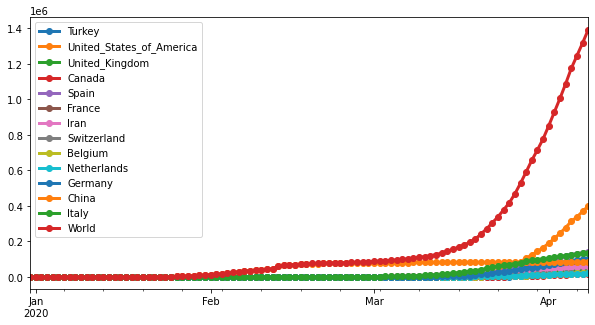

In [166]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
asdf.plot.line(linewidth=3, marker="o", ax=ax)

<IPython.core.display.Javascript object>


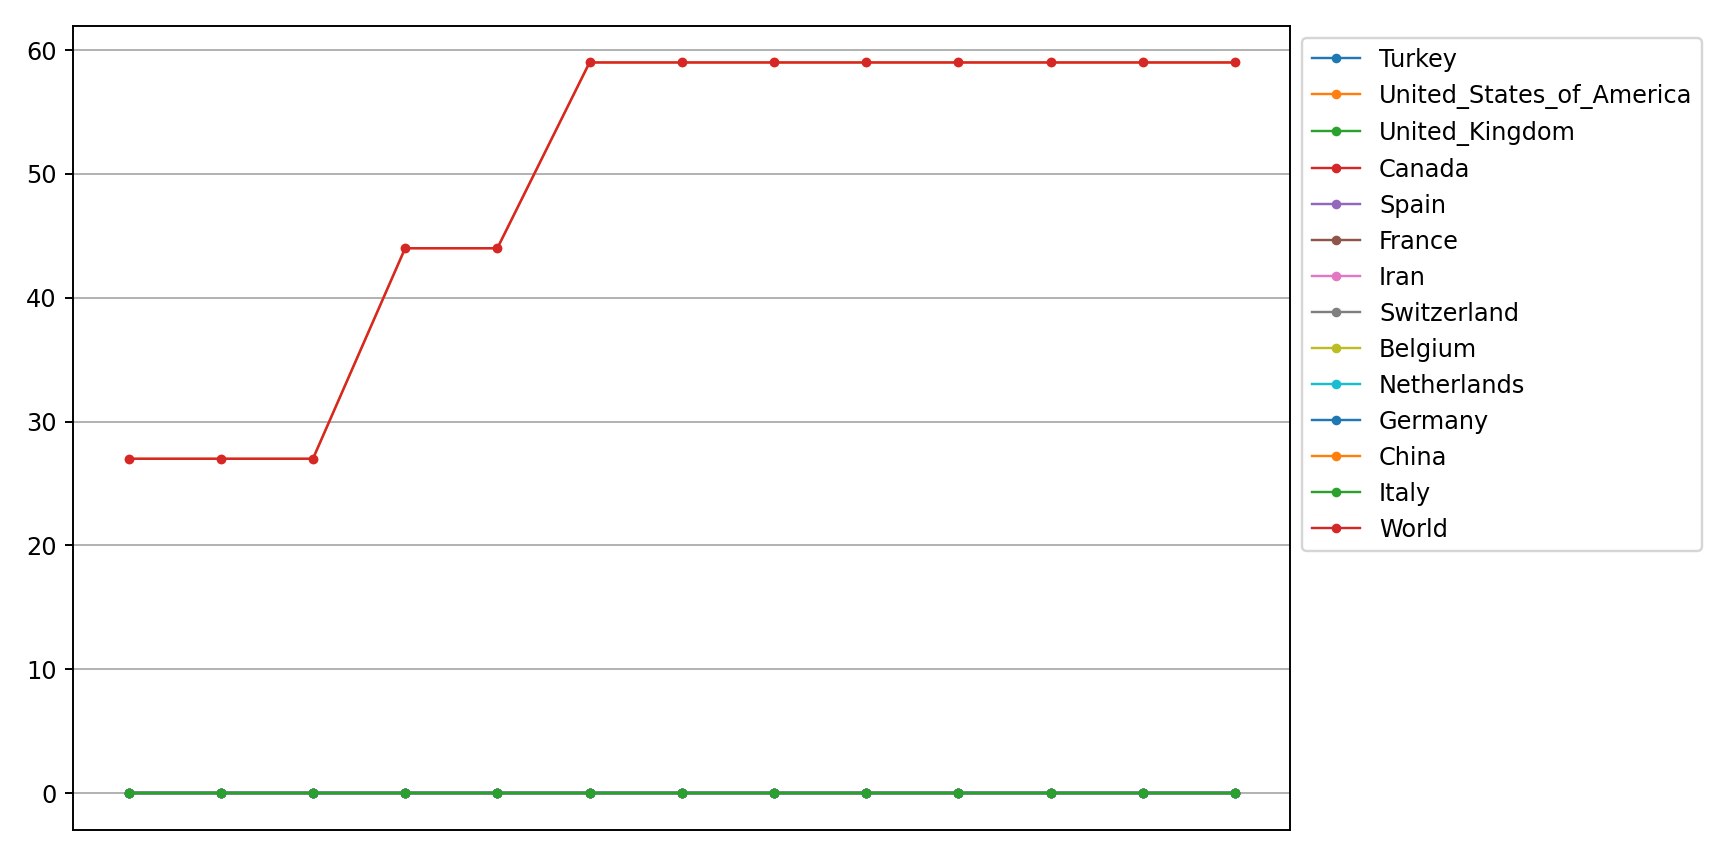

In [167]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(10, 5))

i = 0

def animate(i):
    data = asdf.iloc[:i+1, :]
    x = data.index
    y = data.loc[:, :].values
    display(data)
    ax.clear()
    ax.plot(x, y, linewidth=1, marker="o", markersize=3)
    ax.legend(labels=[c for c in data.columns],
               bbox_to_anchor=[1,1])
#     ax.tick_params(axis="y", colors="k", labelsize=12)
    ax.grid(which="major", axis="y", linestyle="-")
    ax.set_xticks([])
    plt.tight_layout()

# animate(25)
ani = FuncAnimation(plt.gcf(), animate, frames=len(asdf), interval=250, blit=True)

In [136]:
col_names = [c for c in test_data.columns]
col_vals = test_data.iloc[-1, :].values
z = sorted(zip(col_names, col_vals), key=lambda x: x[1], reverse=False)
new_cols = [t[0] for t in z]
test_data = test_data.reindex(columns=new_cols)

NameError: name 'test_data' is not defined

<IPython.core.display.Javascript object>


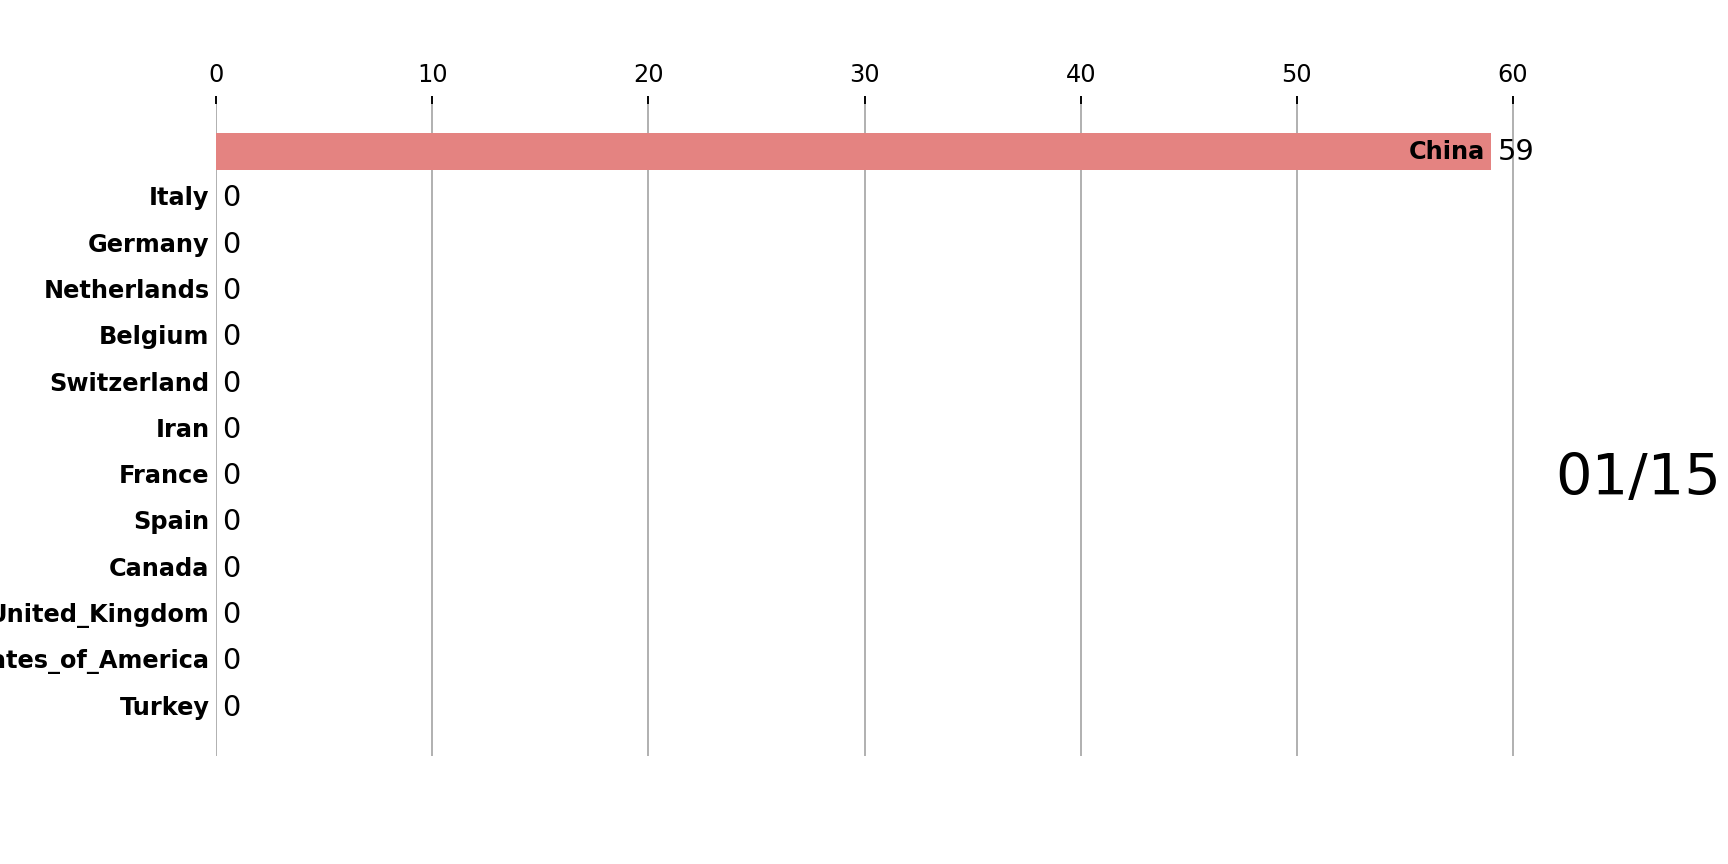

In [170]:
fig, ax = plt.subplots(figsize=(10, 5))

def draw_barchart(date):
    
    sub_df = asdf[asdf.index==date].T.sort_values(by=date).drop("World")
#     display(sub_df)
    ax.clear()
    ax.barh(sub_df.index, sub_df[date], color=[country_to_color(x) for x in sub_df.index])
    dx = sub_df[date].max() / 200 
    for i, (value, name) in enumerate(zip(sub_df[date], sub_df.index)):
        ax.text(value-dx,    i,    name,     size=10, weight=600, ha="right", va="center")
        ax.text(value+dx,    i,    f"{value:,.0f}",    size=12, ha="left", va="center")
    ax.text(1.0, 0.4, date.strftime("%m/%d"), transform=ax.transAxes, size=24)
    ax.grid(which="major", axis="x")
    ax.xaxis.set_ticks_position('top')
    ax.set_axisbelow(True)
    ax.set_yticks([])
    plt.box(False)
    
    
origin = date(2019, 12, 31) # earliest recorded date in WHO files
today = date.today()
delta = today-origin # days since earliest report
date_list = pd.date_range(origin, periods=delta.days)
date_list[0]
# draw_barchart(date_list[0])

ani = FuncAnimation(fig, draw_barchart, interval=250, frames=date_list)

<IPython.core.display.Javascript object>


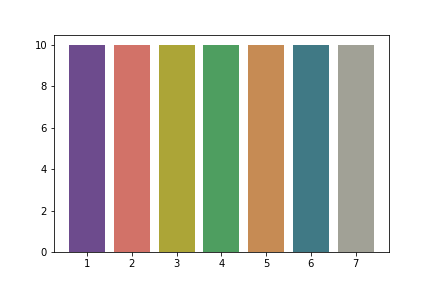

ValueError: Length of values does not match length of index

In [401]:

# for country in [c for c in df2.columns if c != "World"]:
    


country_to_color(top1_data)

In [357]:
top1_data

,World,China,Italy,Iran,South Korea,Spain,France,Germany,Switzerland,United States
date,,,,,,,,,,
2020-01-21,282.0,278.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,314.0,310.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,581.0,574.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2020-01-24,846.0,835.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
2020-01-25,1320.0,1297.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0
2020-01-26,2014.0,1985.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0
2020-01-27,2798.0,2761.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,5.0
2020-01-28,4593.0,4537.0,0.0,0.0,4.0,0.0,3.0,1.0,0.0,5.0
2020-01-29,6065.0,5997.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,5.0
